The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Preparing dsb data ...
Resampling ...


100%|██████████| 3/3 [00:00<00:00, 599.70it/s]
C:\Users\chuyin.wang\AppData\Local\Temp\ipykernel_6800\1647337631.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_driver.figure.show()


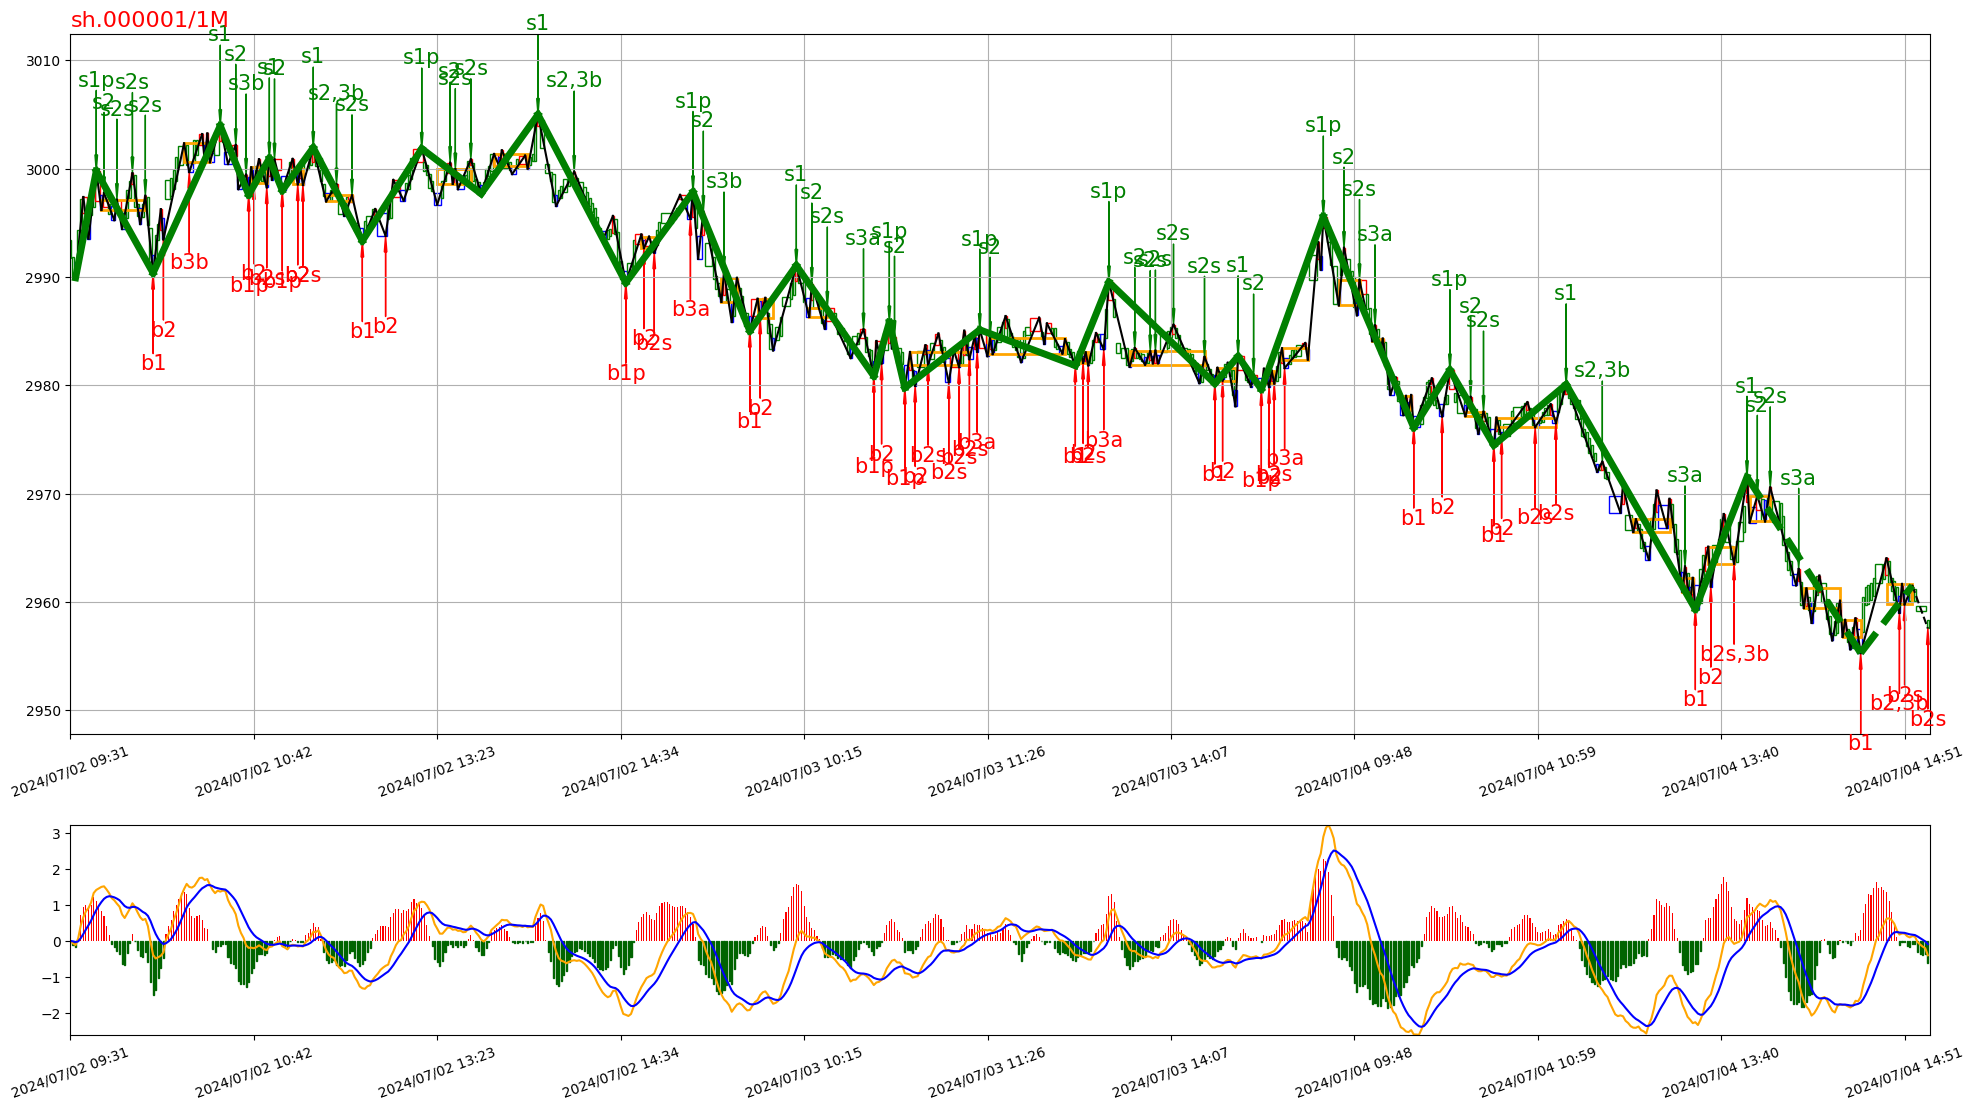

In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os, sys
from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.AnimatePlotDriver import CAnimateDriver
from Plot.PlotDriver import CPlotDriver
sys.path.append("../..")

def main():
    code = "sh.000001"
    begin_time = "2024-07-01"
    end_time = "2024-07-05"
    data_src = DATA_SRC.WT
    lv_list = [KL_TYPE.K_1M]

    config = CChanConfig({
        "trigger_step": False,
    })

    plot_config = {
        "plot_kline": False,
        "plot_kline_combine": True,
        "plot_bi": True,
        "plot_seg": True,
        "plot_eigen": False, # 笔的特征序列
        "plot_zs": True,
        "plot_macd": True,
        "plot_mean": False,
        "plot_channel": False,
        "plot_bsp": True,
        #　"plot_extrainfo": False,
        "plot_demark": False,
        "plot_marker": True,
        "plot_rsi": False,
        "plot_kdj": False,
    }

    plot_para = {
        "seg": {
            "plot_trendline": False,
        },
        "bi": {
            "show_num": False,
            "disp_end": False, # show vertex price
        },
        "figure": {
            # "x_range":240,
        },
        "marker": {
            "markers": {  # text, position, color
                # '2024/01/02': ('marker here1', 'up', 'red'),
                # '2024/02/01': ('marker here2', 'down')
            },
        },
        "animation_pause_time": 0
    }
    chan = CChan(
        code=code,
        begin_time=begin_time,
        end_time=end_time,
        data_src=data_src,
        lv_list=lv_list,
        config=config,
        autype=AUTYPE.QFQ,
    )

    if not config.trigger_step:
        plot_driver = CPlotDriver(
            chan,
            plot_config=plot_config,
            plot_para=plot_para,
        )
        # plot_driver.save2img('./image.png')
        plot_driver.figure.show()
    else:
        CAnimateDriver(
            chan,
            plot_config=plot_config,
            plot_para=plot_para,
        )
# input()

if __name__ == "__main__":
    main()